In [1]:
from sklearn import svm
import cv2
import os
import numpy as np
import pickle

In [2]:
paths=['datasets/train_folder/0','datasets/train_folder/1','datasets/test_folder/0','datasets/test_folder/1']
IMG_SIZE = 50

In [3]:
train_paths=[]
train_labels=[]
train_data=[]
test_paths=[]
test_labels=[]
test_data=[]

In [4]:
for _ in os.listdir(paths[0]):
    train_paths.append(paths[0]+'/'+_)
    train_labels.append(0)
for _ in os.listdir(paths[1]):
    train_paths.append(paths[1]+'/'+_)
    train_labels.append(1)

In [5]:
for _ in os.listdir(paths[2]):
    test_paths.append(paths[2]+'/'+_)
    test_labels.append(0)
for _ in os.listdir(paths[3]):
    test_paths.append(paths[3]+'/'+_)
    test_labels.append(1)

In [6]:
for _ in range(len(train_paths)):
    img = cv2.imread(train_paths[_], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    train_data.append(np.array(img))

In [7]:
for _ in test_paths:
    img = cv2.imread(_, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_data.append(np.array(img))

In [8]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)
test_labels=np.array(test_labels)
train_data=train_data/255.0
test_data=test_data/255.0

In [9]:
train_data=train_data.flatten().reshape(-1,IMG_SIZE*IMG_SIZE)
test_data=test_data.flatten().reshape(-1,IMG_SIZE*IMG_SIZE)

In [10]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', kernel='rbf', C=1.0, random_state=0)
clf.probability=True
clf.fit(train_data, train_labels)

SVC(decision_function_shape='ovo', probability=True, random_state=0)

In [11]:
clf.predict(test_data)

array([0, 1, 0, ..., 1, 1, 1])

In [12]:
clf.score(test_data, test_labels)

0.7775

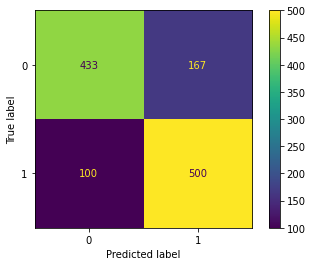

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf, test_data, test_labels)
plt.show()

In [14]:
filename = 'svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [15]:
# model=pickle.load(open(filename, 'rb'))
# model.score(test_data, test_labels)

0.7775